<a href="https://colab.research.google.com/github/RNAB100/Learning_Pytorch/blob/main/breast_cancer_detect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/gdrive/MyDrive/kaggle_dataset'

In [3]:
%cd /content/gdrive/MyDrive/kaggle_dataset
!ls

/content/gdrive/MyDrive/kaggle_dataset
breast-cancer-wisconsin-data.zip  data.csv  kaggle.json


In [4]:
!kaggle datasets download -d uciml/breast-cancer-wisconsin-data

Dataset URL: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data
License(s): CC-BY-NC-SA-4.0
breast-cancer-wisconsin-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [6]:
!unzip *.zip

Archive:  breast-cancer-wisconsin-data.zip
replace data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [8]:
data = pd.read_csv("data.csv")

In [10]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [11]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [12]:
data.shape

(569, 33)

In [13]:
data.drop([data.columns[-1], "id"], axis = 1, inplace = True)

In [14]:
target = data["diagnosis"]
data.drop(["diagnosis"], axis = 1, inplace = True)
data.shape

(569, 30)

In [15]:
train_x, test_x, train_y, test_y = train_test_split(data, target, test_size = 0.1, random_state = 1234)

In [16]:
train_x.shape, test_x.shape

((512, 30), (57, 30))

In [17]:
train_y = np.where(train_y.values == "M", 1, 0)
test_y = np.where(test_y.values == "M", 1, 0)

In [18]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [19]:
sca = StandardScaler()
sca.fit(data) #will learn mean and variance of whole data which will help to scale train test

StandardScaler()

In [20]:
train_x = sca.transform(train_x)
test_x = sca.transform(test_x)

In [21]:
pd.DataFrame(train_x).head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-0.913757,-1.614903,-0.940332,-0.828172,-0.795650,-1.082717,-0.959693,-0.908700,-1.323900,-0.352645,...,-1.014537,-1.768031,-1.037775,-0.858535,-1.720497,-1.139994,-1.167470,-1.258725,-1.225882,-0.970653
1,-0.507616,0.681912,-0.499185,-0.541486,0.344421,-0.053841,-0.440671,-0.533913,-0.951504,0.682206,...,-0.556884,0.488984,-0.592774,-0.575863,0.562476,-0.130186,-0.496009,-0.497395,-1.023660,0.380938
2,0.830091,-0.048787,0.882746,0.682900,1.262455,1.001757,1.283127,1.549724,1.166043,0.064131,...,0.687682,-0.128194,0.781544,0.542170,1.662757,0.885093,1.101567,2.127061,0.336894,0.369301
3,0.276263,-0.674768,0.313497,0.055775,1.326504,1.447116,0.313883,0.939439,0.691421,0.265431,...,-0.032965,-1.196450,-0.040545,-0.207404,0.273159,0.216510,-0.365516,0.421682,-0.502735,-0.341130
4,-1.266502,-0.276839,-1.273149,-1.048305,-0.942962,-0.948730,-0.929185,-1.113014,-0.480532,0.187463,...,-1.060095,-0.172162,-1.076794,-0.879630,0.281926,-0.819126,-0.998357,-1.364398,0.252769,-0.287930


In [22]:
train_x = torch.tensor(train_x, dtype = torch.float32)
test_x = torch.tensor(test_x, dtype = torch.float32)
train_y = torch.tensor(train_y, dtype = torch.float32)
test_y = torch.tensor(test_y, dtype = torch.float32)

In [23]:
class LR(nn.Module):
  def __init__(self, n_features):
    super(LR, self).__init__()
    self.layer1 = nn.Linear(n_features, 1)
    self.sig = nn.Sigmoid()
  def forward(self, x):
    out0 = self.layer1(x)
    out1 = self.sig(out0)
    return out1

In [24]:
model = LR(30)

In [30]:
loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)
no_of_iterations = 1000

In [31]:
train_loss = []
for epoch in range(no_of_iterations):

  output = model(train_x)
  l = loss_fn(output.squeeze(), train_y)
  train_loss.append(l.detach().numpy())

  #gradient tracks how the loss is genarated
  l.backward()

  optimizer.step()

  #zero_grad
  optimizer.zero_grad()


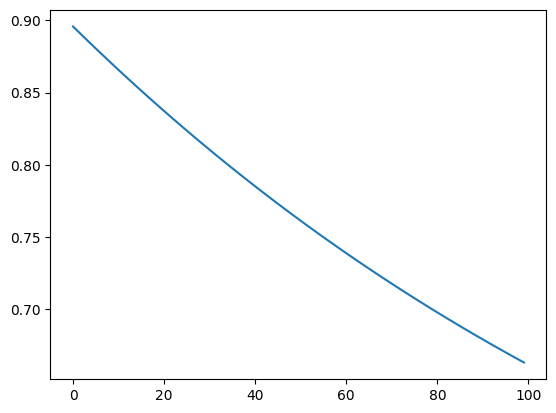

In [27]:
plt.plot(train_loss)